In [6]:
import os
import pandas as pd
import zipfile
import sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder


In [7]:
path = "./datasets/"
f1 = "datos_abiertos_covid19.zip"
f2 = "diccionario_datos_covid19.zip"
with zipfile.ZipFile(path + f1,"r") as db:
    db.extractall(path)

In [8]:
os.listdir(path)

['Actualizaciones en la presentación de información referente a casos de COVID.pdf',
 'datos_abiertos_covid19.zip',
 'Catalogos.xlsx',
 '.~lock.Descriptores_.xlsx#',
 '201128 Descriptores_.xlsx',
 'Descriptores_.xlsx',
 '201128 Catalogos.xlsx',
 'COVID19MEXICO.csv',
 '.~lock.Catalogos.xlsx#']

# DICCIONARIO DATOS

In [9]:
di = pd.read_csv(path + "diccionario_datos_covid19.csv", encoding="latin1")

FileNotFoundError: [Errno 2] No such file or directory: './datasets/diccionario_datos_covid19.csv'

# EDA

In [26]:
df = pd.read_csv(path + "COVID19MEXICO.csv", encoding="latin-1")
df.head(10)

/tmp/ipykernel_20090/1279854889.py:1: DtypeWarning: Columns (38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(path + "COVID19MEXICO.csv", encoding="latin-1")


,FECHA_ACTUALIZACION,ID_REGISTRO,ORIGEN,SECTOR,ENTIDAD_UM,SEXO,ENTIDAD_NAC,ENTIDAD_RES,MUNICIPIO_RES,TIPO_PACIENTE,...,OTRO_CASO,TOMA_MUESTRA_LAB,RESULTADO_LAB,TOMA_MUESTRA_ANTIGENO,RESULTADO_ANTIGENO,CLASIFICACION_FINAL,MIGRANTE,PAIS_NACIONALIDAD,PAIS_ORIGEN,UCI
0,2024-04-23,c9a5ed,2,12,9,2,9,9,9,1,...,2,2,97,1,2,7,99,MÃ©xico,97,97
1,2024-04-23,cbecc9,2,6,5,1,5,5,28,1,...,2,2,97,1,2,7,99,MÃ©xico,97,97
2,2024-04-23,1b6d59,1,12,9,1,9,9,12,1,...,1,2,97,1,1,3,99,MÃ©xico,97,97
3,2024-04-23,0ed066,2,12,16,2,16,16,41,1,...,2,2,97,1,2,7,99,MÃ©xico,97,97
4,2024-04-23,7aeb5d,2,12,3,1,15,3,3,1,...,1,2,97,1,2,7,99,MÃ©xico,97,97
5,2024-04-23,64d705,1,6,18,1,25,18,17,1,...,2,2,97,2,97,6,99,MÃ©xico,97,97
6,2024-04-23,8b1a04,2,9,14,1,14,14,120,2,...,99,1,4,2,97,6,99,MÃ©xico,97,2
7,2024-04-23,78d4d5,2,12,3,1,3,3,3,1,...,2,2,97,1,2,7,99,MÃ©xico,97,97
8,2024-04-23,7f6d0e,2,12,7,1,7,7,107,1,...,2,2,97,2,97,6,99,MÃ©xico,97,97
9,2024-04-23,c90589,2,3,26,1,26,26,42,1,...,2,2,97,2,97,6,99,MÃ©xico,97,97


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296717 entries, 0 to 1296716
Data columns (total 40 columns):
 #   Column                 Non-Null Count    Dtype 
---  ------                 --------------    ----- 
 0   FECHA_ACTUALIZACION    1296717 non-null  object
 1   ID_REGISTRO            1296717 non-null  object
 2   ORIGEN                 1296717 non-null  int64 
 3   SECTOR                 1296717 non-null  int64 
 4   ENTIDAD_UM             1296717 non-null  int64 
 5   SEXO                   1296717 non-null  int64 
 6   ENTIDAD_NAC            1296717 non-null  int64 
 7   ENTIDAD_RES            1296717 non-null  int64 
 8   MUNICIPIO_RES          1296717 non-null  int64 
 9   TIPO_PACIENTE          1296717 non-null  int64 
 10  FECHA_INGRESO          1296717 non-null  object
 11  FECHA_SINTOMAS         1296717 non-null  object
 12  FECHA_DEF              1296717 non-null  object
 13  INTUBADO               1296717 non-null  int64 
 14  NEUMONIA               1296717 non

In [27]:
df.FECHA_SINTOMAS = pd.to_datetime(df["FECHA_SINTOMAS"])
df.FECHA_INGRESO = pd.to_datetime(df["FECHA_INGRESO"])

df.FECHA_DEF = df.FECHA_DEF.str.replace("9999-99-99","2021-01-01")

df.FECHA_DEF = pd.to_datetime(df["FECHA_DEF"])

def date_diff(df,col1, col2):
    return (df[col2]-df[col1]).dt.days
df["time1"] = (df.FECHA_INGRESO- df.FECHA_SINTOMAS ).dt.days
df["time2"] = (df.FECHA_DEF - df.FECHA_INGRESO ).dt.days.clip(lower=0)

In [33]:
df["time2"].describe().max()

1296717.0

<Axes: >

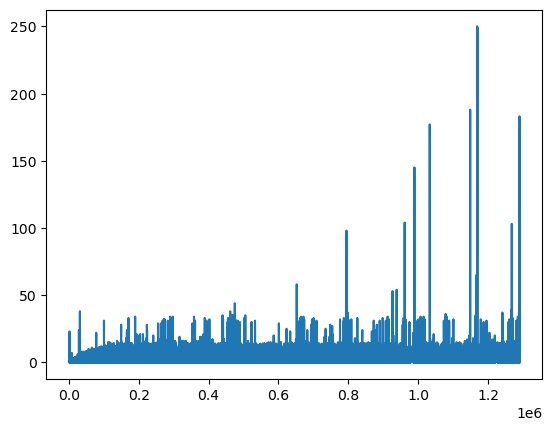

In [23]:
#df.iloc[:,10:13]
df[df["SECTOR"] ==4].time1.plot(kind="line")

<Axes: >

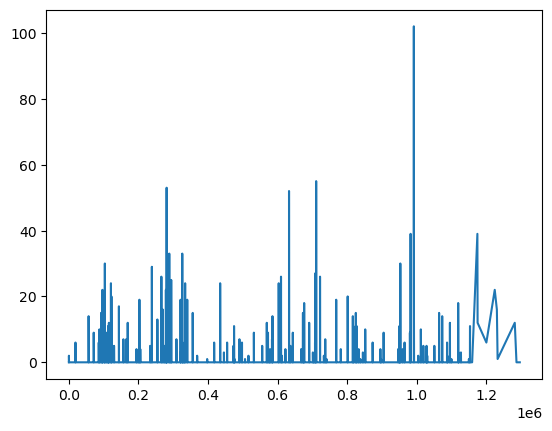

In [36]:
df[df["SECTOR"] ==9].time2.plot(kind="line")

In [ ]:
df.FECHA_SINTOMAS.describe()

count                          1296717
mean     2023-05-02 05:23:04.409088768
min                2023-01-01 00:00:00
25%                2023-02-06 00:00:00
50%                2023-03-25 00:00:00
75%                2023-07-03 00:00:00
max                2024-04-22 00:00:00
Name: FECHA_SINTOMAS, dtype: object

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296717 entries, 0 to 1296716
Data columns (total 42 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   FECHA_ACTUALIZACION    1296717 non-null  object        
 1   ID_REGISTRO            1296717 non-null  object        
 2   ORIGEN                 1296717 non-null  int64         
 3   SECTOR                 1296717 non-null  int64         
 4   ENTIDAD_UM             1296717 non-null  int64         
 5   SEXO                   1296717 non-null  int64         
 6   ENTIDAD_NAC            1296717 non-null  int64         
 7   ENTIDAD_RES            1296717 non-null  int64         
 8   MUNICIPIO_RES          1296717 non-null  int64         
 9   TIPO_PACIENTE          1296717 non-null  int64         
 10  FECHA_INGRESO          1296717 non-null  datetime64[ns]
 11  FECHA_SINTOMAS         1296717 non-null  datetime64[ns]
 12  FECHA_DEF              12967

In [50]:
df["SECTOR"].value_counts()

SECTOR
4     671336
12    431114
9      87811
6      72507
3      22440
8       3773
5       3697
13      1592
7        720
11       532
2        530
10       458
99       182
1         25
Name: count, dtype: int64

<Axes: xlabel='SECTOR'>

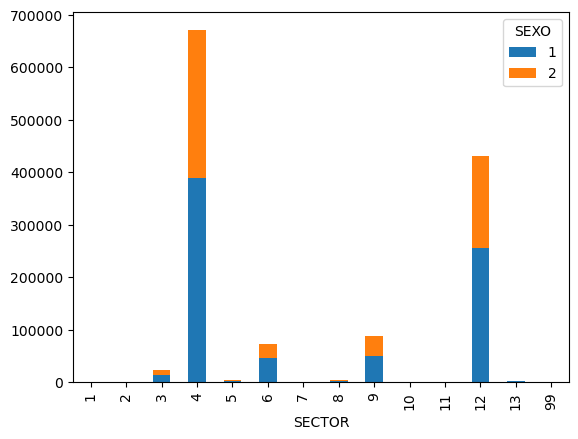

In [49]:
df_temp = df[["SECTOR","SEXO"]]
df_g1 = df_temp.groupby(["SECTOR","SEXO"]).size().unstack()
df_g1.plot(kind="bar",stacked=True)

<Axes: xlabel='TIPO_PACIENTE'>

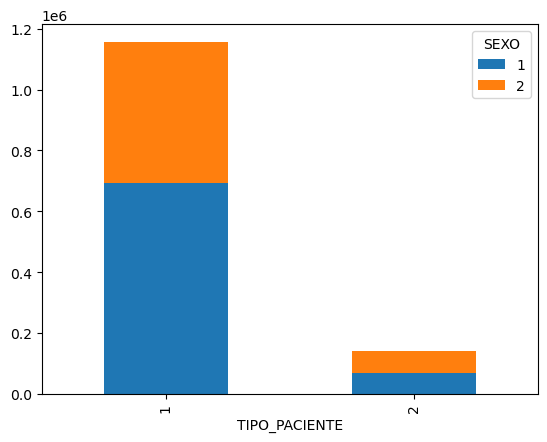

In [57]:
#df_temp2 = df[["TIPO_PACIENTE","SEXO"]]
df_g2 = df.groupby(["TIPO_PACIENTE","SEXO"]).size().unstack()
df_g2.plot(kind="bar",stacked=True)

In [53]:
df.TIPO_PACIENTE.unique()

array([1, 2])

In [46]:
df_g1.describe()

count        28.000000
mean      46311.321429
std      100778.193204
min          11.000000
25%         255.750000
50%        1220.000000
75%       29068.250000
max      389968.000000
Name: count, dtype: float64

de cada estado cual era el procentaje de hombres y mujeres con covid y sus edades
de cada estado el tiempo de sintomas a el tiempo de defuncion

In [ ]:
df["time1"] = df.FECHA_SINTOMAS -df.FECHA_INGRESO
df["time2"] = df.FECHA_INGRESO - df.FECHA_DEF



/tmp/ipykernel_8241/1955021372.py:1: PerformanceWarning: Adding/subtracting object-dtype array to DatetimeArray not vectorized.
  df["time1"] = df.FECHA_SINTOMAS -df.FECHA_INGRESO


TypeError: unsupported operand type(s) for -: 'Timestamp' and 'str'